# **Sentiment Analysis**

## **Imports**

In [1]:
#python -m spacy download de_core_news_sm
from germansentiment import SentimentModel
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from IPython.display import display

## **Sentiment**

### German Sentiment Model

https://huggingface.co/oliverguhr/german-sentiment-bert?text=Da+sisrt+super

In [12]:
from germansentiment import SentimentModel
import spacy
import pandas as pd

nlp = spacy.load("de_core_news_sm")
with open('../manifestos/cdu_csu_text.txt', 'r', encoding='utf-8') as file:
    manifesto_text = file.read()

# Teile den Text in Abschnitte auf
sections = manifesto_text.split('\n')  

data = {'Section': [], 'Sentiment': [], 'Score': []}

model = SentimentModel()

for section in sections:
    pred_class, probabilities = model.predict_sentiment([section], output_probabilities=True)
    max_probability = max(probabilities[0], key=lambda x: x[1])[1]
    
    data['Section'].append(section)
    data['Sentiment'].append(pred_class[0])
    data['Score'].append(max_probability)

df_sections = pd.DataFrame(data)
df_sections.to_csv('section_sentiment_results.csv', index=False)


                                                Section Sentiment     Score
0                        Das Programm für Stabilität      neutral  0.995390
1                                     und Erneuerung.     neutral  0.980587
2       GEMEINSAM FÜR EIN MODERNES DEUTSCHLAND.   Se...   neutral  0.999979
3                                                        negative  0.872363
4     Einleitung ......................................  positive  0.950967
...                                                 ...       ...       ...
4947                                       den.  4994     neutral  0.962820
4948  • Wir unterstützen die Bewerbungen für interna...   neutral  0.999981
4949  Deutschland. Diese müssen ökologisch, ökonomis...   neutral  0.999976
4950  auf eine breite gesellschaftliche Zustimmung s...   neutral  0.999793
4951  Bewerbung um olympische Spiele in Deutschland....   neutral  0.999901

[4952 rows x 3 columns]


In [14]:
df_sections[df_sections.Sentiment == "positive"]

,Section,Sentiment,Score
4,Einleitung ......................................,positive,0.950967
38,Zusammenhalt ....................................,positive,0.909158
42,4.4. Gute Pflege für mehr Sicherheit und Halt ...,positive,0.941013
71,9.1. Mehr Sicherheit überall und jederzeit ......,positive,0.999531
81,10.1. Gutes Wohnen in lebendigen Dörfern und S...,positive,0.994375
...,...,...,...
4881,punkt. 4926,positive,0.575198
4884,4929,positive,0.902247
4902,4947,positive,0.904852
4912,werden. 4958,positive,0.628903


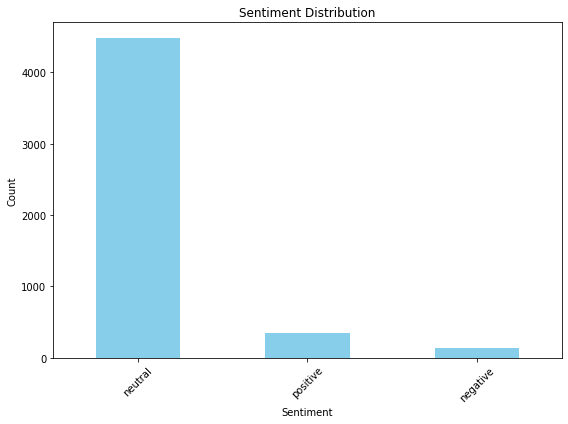

In [15]:
sentiment_counts = df_sections['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [18]:
for index, row in df_sections.iterrows():
    sentiment = row['Sentiment']
    paragraph = row['Section']

    if sentiment == 'positive':
        color = 'green'
    elif sentiment == 'negative':
        color = 'red'
    else:
        color = 'black'

    display(HTML(f'<font color="{color}">{paragraph}</font>'))
